In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix

In [10]:
# Loading the fMnist Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [11]:
# Check the shape of training and testing data
print("The Shape of the Training Set:", x_train.shape)
print("The Number of Training Samples:", len(x_train))
print("The Dimension of the Image:", x_train[0].shape)


The Shape of the Training Set: (60000, 28, 28)
The Number of Training Samples: 60000
The Dimension of the Image: (28, 28)


In [12]:
print("The Shape of the Test Set:", x_test.shape)
print("The Number of Test Samples:", len(x_test))

# Number of Classes Present in the Dataset
print("Number of Classes:",  len(np.unique(train_labels)))

The Shape of the Test Set: (10000, 28, 28)
The Number of Test Samples: 10000
Number of Classes: 10


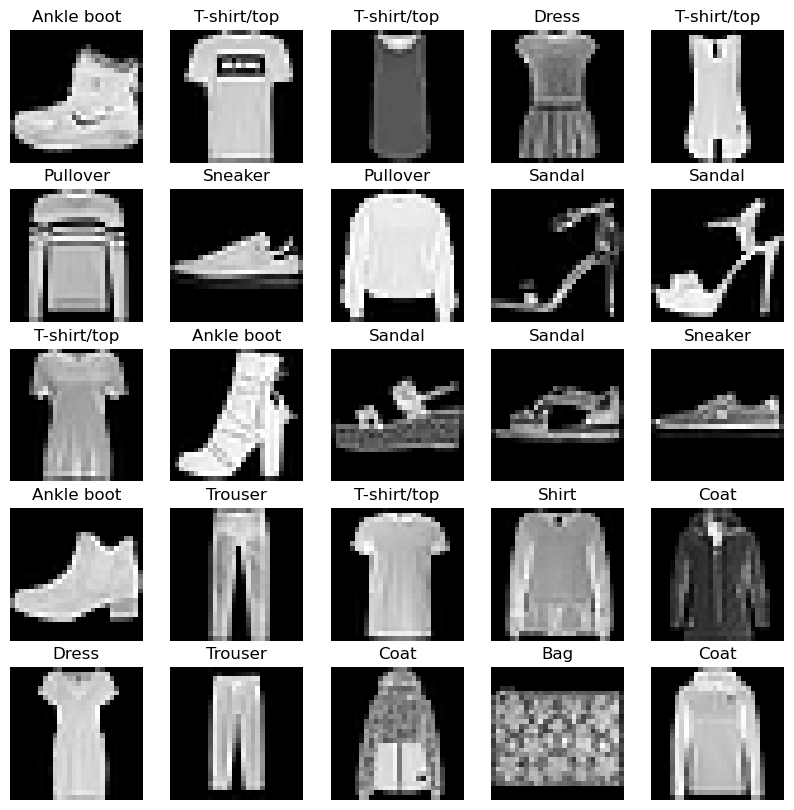

In [13]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# Plot sample images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(classes[train_labels[i]])
    plt.axis('off')
plt.show()

In [16]:
# Flatten images into 1-d array
train_images = x_train.reshape((60000, 28 * 28))
test_images = x_test.reshape((10000, 28 * 28))

# Normalize the pixel values to the range [0, 1]
train_images = train_images.astype("float32") / 255  
test_images = test_images.astype("float32") / 255

In [19]:
# Modelling
model = Sequential([
    Dense(128, activation='relu'),
     Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(train_images, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5437 - accuracy: 0.8144
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3966 - accuracy: 0.8595
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3592 - accuracy: 0.8723
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3332 - accuracy: 0.8801
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3178 - accuracy: 0.8852
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3019 - accuracy: 0.8917
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2920 - accuracy: 0.8948
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2774 - accuracy: 0.8997
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2717 - accuracy: 0.9006
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2614 - accuracy: 0.9054

In [20]:
# Accuracy Metrics
loss_test, acc_test = model.evaluate(test_images, y_test)
print("The Accuracy of the Test Set: ", acc_test)
print("The Loss of the Test Set : ", loss_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3318 - accuracy: 0.8809
The Accuracy of the Test Set:  0.8809000253677368
The Loss of the Test Set :  0.33182281255722046


In [22]:
preds = model.predict(test_images)
labels_predicted = np.argmax(preds, axis=1)

313/313 [==============================] - 0s 2ms/step


In [25]:
precision = precision_score(y_test, labels_predicted , average='weighted')
recall = recall_score(y_test, labels_predicted, average='weighted')
f1score = f1_score(y_test, labels_predicted, average='weighted')

print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1 Score :  {f1score}')

Precision : 0.8810244216971019
Recall : 0.8809
F1 Score :  0.8801560952345228


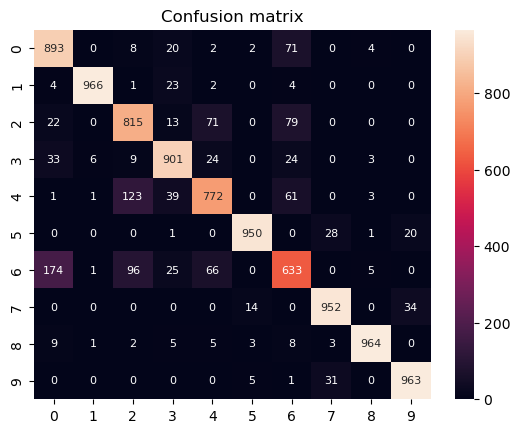

In [30]:
#confusion matrix
#cm = confusion_matrix(y_test, labels_predicted)
sns.heatmap(
  confusion_matrix(y_test, labels_predicted), annot = True,
    annot_kws={"size": 8}, fmt='g')
plt.title("Confusion matrix")
plt.show()
    